# **CycleGAN**

---

<font size = 4>CycleGAN is a method that can capture the characteristics of one image domain and learn how these characteristics can be translated into another image domain, all in the absence of any paired training examples. It was first published by [Zhu *et al.* in 2017](https://arxiv.org/abs/1703.10593). Unlike pix2pix, the image transformation performed does not require paired images for training (unsupervised learning) and is made possible here by using a set of two Generative Adversarial Networks (GANs) that learn to transform images both from the first domain to the second and vice-versa.

<font size = 4> **This particular notebook enables unpaired image-to-image translation. If your dataset is paired, you should also consider using the pix2pix notebook.**

---

<font size = 4>*Disclaimer*:

<font size = 4>This notebook is part of the *Zero-Cost Deep-Learning to Enhance Microscopy* project (https://github.com/HenriquesLab/DeepLearning_Collab/wiki). Jointly developed by the Jacquemet (link to https://cellmig.org/) and Henriques (https://henriqueslab.github.io/) laboratories.

<font size = 4>This notebook is based on the following paper: 

<font size = 4> **Unpaired Image-to-Image Translation using Cycle-Consistent Adversarial Networks** from Zhu *et al.* published in arXiv in 2018 (https://arxiv.org/abs/1703.10593)

<font size = 4>The source code of the CycleGAN PyTorch implementation  can be found in: https://github.com/junyanz/pytorch-CycleGAN-and-pix2pix

<font size = 4>**Please also cite this original paper when using or developing this notebook.**

# **License**

---

In [1]:
#@markdown ##Double click to see the license information

#------------------------- LICENSE FOR ZeroCostDL4Mic------------------------------------
#This ZeroCostDL4Mic notebook is distributed under the MIT licence



#------------------------- LICENSE FOR CycleGAN ------------------------------------

#Copyright (c) 2017, Jun-Yan Zhu and Taesung Park
#All rights reserved.

#Redistribution and use in source and binary forms, with or without
#modification, are permitted provided that the following conditions are met:

#* Redistributions of source code must retain the above copyright notice, this
#  list of conditions and the following disclaimer.

#* Redistributions in binary form must reproduce the above copyright notice,
#  this list of conditions and the following disclaimer in the documentation
#  and/or other materials provided with the distribution.

#THIS SOFTWARE IS PROVIDED BY THE COPYRIGHT HOLDERS AND CONTRIBUTORS "AS IS"
#AND ANY EXPRESS OR IMPLIED WARRANTIES, INCLUDING, BUT NOT LIMITED TO, THE
#IMPLIED WARRANTIES OF MERCHANTABILITY AND FITNESS FOR A PARTICULAR PURPOSE ARE
#DISCLAIMED. IN NO EVENT SHALL THE COPYRIGHT HOLDER OR CONTRIBUTORS BE LIABLE
#FOR ANY DIRECT, INDIRECT, INCIDENTAL, SPECIAL, EXEMPLARY, OR CONSEQUENTIAL
#DAMAGES (INCLUDING, BUT NOT LIMITED TO, PROCUREMENT OF SUBSTITUTE GOODS OR
#SERVICES; LOSS OF USE, DATA, OR PROFITS; OR BUSINESS INTERRUPTION) HOWEVER
#CAUSED AND ON ANY THEORY OF LIABILITY, WHETHER IN CONTRACT, STRICT LIABILITY,
#OR TORT (INCLUDING NEGLIGENCE OR OTHERWISE) ARISING IN ANY WAY OUT OF THE USE
#OF THIS SOFTWARE, EVEN IF ADVISED OF THE POSSIBILITY OF SUCH DAMAGE.


#--------------------------- LICENSE FOR pix2pix --------------------------------
#BSD License

#For pix2pix software
#Copyright (c) 2016, Phillip Isola and Jun-Yan Zhu
#All rights reserved.

#Redistribution and use in source and binary forms, with or without
#modification, are permitted provided that the following conditions are met:

#* Redistributions of source code must retain the above copyright notice, this
#  list of conditions and the following disclaimer.

#* Redistributions in binary form must reproduce the above copyright notice,
#  this list of conditions and the following disclaimer in the documentation
#  and/or other materials provided with the distribution.

#----------------------------- LICENSE FOR DCGAN --------------------------------
#BSD License

#For dcgan.torch software

#Copyright (c) 2015, Facebook, Inc. All rights reserved.

#Redistribution and use in source and binary forms, with or without modification, are permitted provided that the following conditions are met:

#Redistributions of source code must retain the above copyright notice, this list of conditions and the following disclaimer.

#Redistributions in binary form must reproduce the above copyright notice, this list of conditions and the following disclaimer in the documentation and/or other materials provided with the distribution.

#Neither the name Facebook nor the names of its contributors may be used to endorse or promote products derived from this software without specific prior written permission.

#THIS SOFTWARE IS PROVIDED BY THE COPYRIGHT HOLDERS AND CONTRIBUTORS "AS IS" AND ANY EXPRESS OR IMPLIED WARRANTIES, INCLUDING, BUT NOT LIMITED TO, THE IMPLIED WARRANTIES OF MERCHANTABILITY AND FITNESS FOR A PARTICULAR PURPOSE ARE DISCLAIMED. IN NO EVENT SHALL THE COPYRIGHT HOLDER OR CONTRIBUTORS BE LIABLE FOR ANY DIRECT, INDIRECT, INCIDENTAL, SPECIAL, EXEMPLARY, OR CONSEQUENTIAL DAMAGES (INCLUDING, BUT NOT LIMITED TO, PROCUREMENT OF SUBSTITUTE GOODS OR SERVICES; LOSS OF USE, DATA, OR PROFITS; OR BUSINESS INTERRUPTION) HOWEVER CAUSED AND ON ANY THEORY OF LIABILITY, WHETHER IN CONTRACT, STRICT LIABILITY, OR TORT (INCLUDING NEGLIGENCE OR OTHERWISE) ARISING IN ANY WAY OUT OF THE USE OF THIS SOFTWARE, EVEN IF ADVISED OF THE POSSIBILITY OF SUCH DAMAGE.

# **0. Before getting started**
---
<font size = 4> To train CycleGAN, **you only need two folders containing PNG images**. The images do not need to be paired.

<font size = 4>While you do not need paired images to train CycleGAN, if possible, **we strongly recommend that you generate  a paired dataset. This means that the same image needs to be acquired in the two conditions. These images can be used to assess the quality of your trained model (Quality control dataset)**. The quality control assessment can be done directly in this notebook.


<font size = 4> Please note that you currently can **only use .png files!**


<font size = 4>Here's a common data structure that can work:
*   Experiment A
    - **Training dataset (non-matching images)**
      - Training_source
        - img_1.png, img_2.png, ...
      - Training_target
        - img_1.png, img_2.png, ...
    - **Quality control dataset (matching images)**
     - Training_source
        - img_1.png, img_2.png
      - Training_target
        - img_1.png, img_2.png
    - **Data to be predicted**
    - **Results**

---
<font size = 4>**Important note**

<font size = 4>- If you wish to **Train a network from scratch** using your own dataset (and we encourage everyone to do that), you will need to run **sections 1 - 4**, then use **section 5** to assess the quality of your model and **section 6** to run predictions using the model that you trained.

<font size = 4>- If you wish to **Evaluate your model** using a model previously generated and saved on your Google Drive, you will only need to run **sections 1 and 2** to set up the notebook, then use **section 5** to assess the quality of your model.

<font size = 4>- If you only wish to **run predictions** using a model previously generated and saved on your Google Drive, you will only need to run **sections 1 and 2** to set up the notebook, then use **section 6** to run the predictions on the desired model.
---

# **1. Install CycleGAN and dependencies**
---


In [2]:
import os
cyclegan_working_directory = "/home/ocb/HardDrive_4TB/EGM/MULTICHANNEL/CYCLEGAN/MODELS/working_dir/"
cyclegan_code_dir = "/home/ocb/HardDrive_4TB/EGM/PHX/PhotoFITT/notebooks/deep-learning/cycleGAN/"
os.chdir(cyclegan_code_dir)
!ls

CycleGAN_ZeroCostDL4Mic.ipynb	  nohup.out
CycleGAN_requirements_simple.txt  pytorch-CycleGAN-and-pix2pix
bash_training_logs		  train_cyclegan.sh


In [3]:
Notebook_version = '1.13.1'
Network = 'CycleGAN'

from builtins import any as b_any

def get_requirements_path():
    # Store requirements file in 'contents' directory 
    current_dir = os.getcwd()
    dir_count = current_dir.count('/') - 1
    path = '../' * (dir_count) + 'requirements.txt'
    return path

def filter_files(file_list, filter_list):
    filtered_list = []
    for fname in file_list:
        if b_any(fname.split('==')[0] in s for s in filter_list):
            filtered_list.append(fname)
    return filtered_list

def build_requirements_file(before, after):
    path = get_requirements_path()

    # Exporting requirements.txt for local run
    !pip freeze > $path

    # Get minimum requirements file
    df = pd.read_csv(path)
    mod_list = [m.split('.')[0] for m in after if not m in before]
    req_list_temp = df.values.tolist()
    req_list = [x[0] for x in req_list_temp]

    # Replace with package name and handle cases where import name is different to module name
    mod_name_list = [['sklearn', 'scikit-learn'], ['skimage', 'scikit-image']]
    mod_replace_list = [[x[1] for x in mod_name_list] if s in [x[0] for x in mod_name_list] else s for s in mod_list] 
    filtered_list = filter_files(req_list, mod_replace_list)

    file=open(path,'w')
    for item in filtered_list:
        file.writelines(item)

    file.close()

import sys
before = [str(m) for m in sys.modules]

#@markdown ##Install CycleGAN and dependencies

#------- Code from the cycleGAN demo notebook starts here -------

#Here, we install libraries which are not already included in Colab.
#!git clone https://github.com/junyanz/pytorch-CycleGAN-and-pix2pix

import os
#!pip install -r pytorch-CycleGAN-and-pix2pix/requirements.txt
#!pip install fpdf2

import imageio
from skimage import data
from skimage import exposure
from skimage.exposure import match_histograms

from skimage.util import img_as_int

# ------- Common variable to all ZeroCostDL4Mic notebooks -------
import numpy as np
from matplotlib import pyplot as plt
import urllib
import os, random
import shutil 
import zipfile
from tifffile import imread, imsave
import time
import sys
from pathlib import Path
import pandas as pd
import csv
from glob import glob
from scipy import signal
from scipy import ndimage
from skimage import io
from sklearn.linear_model import LinearRegression
from skimage.util import img_as_uint
import matplotlib as mpl
from skimage.metrics import structural_similarity
from skimage.metrics import peak_signal_noise_ratio as psnr
from astropy.visualization import simple_norm
from skimage import img_as_float32
from skimage.util import img_as_ubyte
from tqdm import tqdm 
from fpdf import FPDF, HTMLMixin
from datetime import datetime
from pip._internal.operations.freeze import freeze
import subprocess

import torch

# Colors for the warning messages
class bcolors:
  WARNING = '\033[31m'

#Disable some of the tensorflow warnings
import warnings
warnings.filterwarnings("ignore")

print("Libraries installed")


# Check if this is the latest version of the notebook
All_notebook_versions = pd.read_csv("https://raw.githubusercontent.com/HenriquesLab/ZeroCostDL4Mic/master/Colab_notebooks/Latest_Notebook_versions.csv", dtype=str)
print('Notebook version: '+Notebook_version)
Latest_Notebook_version = All_notebook_versions[All_notebook_versions["Notebook"] == Network]['Version'].iloc[0]
print('Latest notebook version: '+Latest_Notebook_version)
if Notebook_version == Latest_Notebook_version:
  print("This notebook is up-to-date.")
else:
  print(bcolors.WARNING +"A new version of this notebook has been released. We recommend that you download it at https://github.com/HenriquesLab/ZeroCostDL4Mic/wiki")


#Here we copy and normalise the data
def normalise_data(Source_QC_folder, Normalisation_QC_source, Im_path):

    for filename in os.listdir(Source_QC_folder):
        img = io.imread(os.path.join(Source_QC_folder,filename)).astype(np.float32)
        short_name = os.path.splitext(filename)
        if Normalisation_QC_source == "Contrast stretching":
            p2, p99 = np.percentile(img, (2, 99.9))
            img = exposure.rescale_intensity(img, in_range=(p2, p99))
            img = 255 * img # Now scale by 255
            img = img.astype(np.uint8)

        elif Normalisation_QC_source == "Adaptive Equalization":
            img = exposure.equalize_adapthist(img, clip_limit=0.03)
            img = 255 * img # Now scale by 255
            img = img.astype(np.uint8)
        imageio.imsave(os.path.join(Im_path, f"{short_name[0]}.png"), img)

def pdf_export(trained = False, augmentation = False, pretrained_model = False):
  class MyFPDF(FPDF, HTMLMixin):
    pass

  pdf = MyFPDF()
  pdf.add_page()
  pdf.set_right_margin(-1)
  pdf.set_font("Arial", size = 11, style='B') 

  day = datetime.now()
  datetime_str = str(day)[0:10]

  Header = 'Training report for '+Network+' model ('+model_name+')\nDate: '+datetime_str
  pdf.multi_cell(180, 5, txt = Header, align = 'L') 
  pdf.ln(1)
    
  # add another cell
  if trained:
    training_time = "Training time: "+str(hour)+ "hour(s) "+str(mins)+"min(s) "+str(round(sec))+"sec(s)"
    pdf.cell(190, 5, txt = training_time, ln = 1, align='L')
  pdf.ln(1)

  Header_2 = 'Information for your materials and method:'
  pdf.cell(190, 5, txt=Header_2, ln=1, align='L')

  all_packages = ''
  for requirement in freeze(local_only=True):
    all_packages = all_packages+requirement+', '
  # print(all_packages)

  #Main Packages
  main_packages = ''
  version_numbers = []
  for name in ['tensorflow','numpy','torch']:
    find_name=all_packages.find(name)
    main_packages = main_packages+all_packages[find_name:all_packages.find(',',find_name)]+', '
    #Version numbers only here:
    version_numbers.append(all_packages[find_name+len(name)+2:all_packages.find(',',find_name)])

  cuda_version = subprocess.run('nvcc --version',stdout=subprocess.PIPE, shell=True)
  cuda_version = cuda_version.stdout.decode('utf-8')
  cuda_version = cuda_version[cuda_version.find(', V')+3:-1]
  gpu_name = subprocess.run('nvidia-smi',stdout=subprocess.PIPE, shell=True)
  gpu_name = gpu_name.stdout.decode('utf-8')
  gpu_name = gpu_name[gpu_name.find('Tesla'):gpu_name.find('Tesla')+10]
  #print(cuda_version[cuda_version.find(', V')+3:-1])
  #print(gpu_name)

  shape = io.imread(Training_source+'/'+os.listdir(Training_source)[1]).shape
  dataset_size = len(os.listdir(Training_source))

  text = 'The '+Network+' model was trained from scratch for '+str(number_of_epochs)+' epochs on '+str(dataset_size)+' paired image patches (image dimensions: '+str(shape)+', patch size: ('+str(patch_size)+','+str(patch_size)+')) with a batch size of '+str(batch_size)+' and a least-square GAN loss function, using the '+Network+' ZeroCostDL4Mic notebook (v '+Notebook_version[0]+') (von Chamier & Laine et al., 2020). Key python packages used include tensorflow (v '+version_numbers[0]+'), numpy (v '+version_numbers[1]+'), torch (v '+version_numbers[2]+'), cuda (v '+cuda_version+'). The training was accelerated using a '+gpu_name+'GPU.'

  if pretrained_model:
    text = 'The '+Network+' model was trained for '+str(number_of_epochs)+' epochs on '+str(dataset_size)+' paired image patches (image dimensions: '+str(shape)+', patch size: ('+str(patch_size)+','+str(patch_size)+')) with a batch size of '+str(batch_size)+' and an least-square GAN loss function, using the '+Network+' ZeroCostDL4Mic notebook (v '+Notebook_version[0]+') (von Chamier & Laine et al., 2020). The model was retrained from a pretrained model. Key python packages used include tensorflow (v '+version_numbers[0]+'), numpy (v '+version_numbers[1]+'), torch (v '+version_numbers[2]+'), cuda (v '+cuda_version+'). The training was accelerated using a '+gpu_name+'GPU.'

  pdf.set_font('')
  pdf.set_font_size(10.)
  pdf.multi_cell(190, 5, txt = text, align='L')
  pdf.ln(1)
  pdf.set_font('')
  pdf.set_font('Arial', size = 10, style = 'B')
  pdf.ln(1)
  pdf.cell(28, 5, txt='Augmentation: ', ln=0)
  pdf.set_font('')
  if augmentation:
    aug_text = 'The dataset was augmented by default'
  else:
    aug_text = 'No augmentation was used for training.'
  pdf.multi_cell(190, 5, txt=aug_text, align='L')
  pdf.ln(1)
  pdf.set_font('Arial', size = 11, style = 'B')
  pdf.ln(1)
  pdf.cell(180, 5, txt = 'Parameters', align='L', ln=1)
  pdf.set_font('')
  pdf.set_font_size(10.)
  if Use_Default_Advanced_Parameters:
    pdf.cell(200, 5, txt='Default Advanced Parameters were enabled')
  pdf.cell(200, 5, txt='The following parameters were used for training:')
  pdf.ln(1)
  html = """ 
  <table width=40% style="margin-left:0px;">
    <tr>
      <th width = 50% align="left">Parameter</th>
      <th width = 50% align="left">Value</th>
    </tr>
    <tr>
      <td width = 50%>number_of_epochs</td>
      <td width = 50%>{0}</td>
    </tr>
    <tr>
      <td width = 50%>patch_size</td>
      <td width = 50%>{1}</td>
    </tr>
    <tr>
      <td width = 50%>batch_size</td>
      <td width = 50%>{2}</td>
    </tr>
    <tr>
      <td width = 50%>initial_learning_rate</td>
      <td width = 50%>{3}</td>
    </tr>
  </table>
  """.format(number_of_epochs,str(patch_size)+'x'+str(patch_size),batch_size,initial_learning_rate)
  pdf.write_html(html)

  #pdf.multi_cell(190, 5, txt = text_2, align='L')
  pdf.set_font("Arial", size = 11, style='B')
  pdf.ln(1)
  pdf.cell(190, 5, txt = 'Training Dataset', align='L', ln=1)
  pdf.set_font('')
  pdf.set_font('Arial', size = 10, style = 'B')
  pdf.cell(30, 5, txt= 'Training_source:', align = 'L', ln=0)
  pdf.set_font('')
  pdf.multi_cell(170, 5, txt = Training_source, align = 'L')
  pdf.ln(1)
  pdf.set_font('')
  pdf.set_font('Arial', size = 10, style = 'B')
  pdf.cell(29, 5, txt= 'Training_target:', align = 'L', ln=0)
  pdf.set_font('')
  pdf.multi_cell(170, 5, txt = Training_target, align = 'L')
  #pdf.cell(190, 5, txt=aug_text, align='L', ln=1)
  pdf.ln(1)
  pdf.set_font('')
  pdf.set_font('Arial', size = 10, style = 'B')
  pdf.cell(22, 5, txt= 'Model Path:', align = 'L', ln=0)
  pdf.set_font('')
  pdf.multi_cell(170, 5, txt = model_path+'/'+model_name, align = 'L')
  pdf.ln(1)
  pdf.cell(60, 5, txt = 'Example Training pair', ln=1)
  pdf.ln(1)
  exp_size = io.imread(os.path.join(Saving_path, 'TrainingDataExample_cycleGAN.png')).shape
  pdf.image(os.path.join(Saving_path, 'TrainingDataExample_cycleGAN.png'), x = 11, y = None, w = round(exp_size[1]/8), h = round(exp_size[0]/8))
  pdf.ln(1)
  ref_1 = 'References:\n - ZeroCostDL4Mic: von Chamier, Lucas & Laine, Romain, et al. "Democratising deep learning for microscopy with ZeroCostDL4Mic." Nature Communications (2021).'
  pdf.multi_cell(190, 5, txt = ref_1, align='L')
  pdf.ln(1)
  ref_2 = '- cycleGAN: Zhu, Jun-Yan, et al. "Unpaired image-to-image translation using cycle-consistent adversarial networks." Proceedings of the IEEE international conference on computer vision. 2017.'
  pdf.multi_cell(190, 5, txt = ref_2, align='L')
  pdf.ln(1)
  # if Use_Data_augmentation:
  #   ref_3 = '- Augmentor: Bloice, Marcus D., Christof Stocker, and Andreas Holzinger. "Augmentor: an image augmentation library for machine learning." arXiv preprint arXiv:1708.04680 (2017).'
  #   pdf.multi_cell(190, 5, txt = ref_3, align='L')
  pdf.ln(3)
  reminder = 'Important:\nRemember to perform the quality control step on all newly trained models\nPlease consider depositing your training dataset on Zenodo'
  pdf.set_font('Arial', size = 11, style='B')
  pdf.multi_cell(190, 5, txt=reminder, align='C')
  pdf.ln(1)

  pdf.output(model_path+'/'+model_name+'/'+model_name+"_training_report.pdf")


def qc_pdf_export():
  class MyFPDF(FPDF, HTMLMixin):
    pass

  pdf = MyFPDF()
  pdf.add_page()
  pdf.set_right_margin(-1)
  pdf.set_font("Arial", size = 11, style='B') 

  Network = 'cycleGAN'


  day = datetime.now()
  datetime_str = str(day)[0:10]

  Header = 'Quality Control report for '+Network+' model ('+QC_model_name+')\nDate: '+datetime_str
  pdf.multi_cell(180, 5, txt = Header, align = 'L') 
  pdf.ln(1)

  all_packages = ''
  for requirement in freeze(local_only=True):
    all_packages = all_packages+requirement+', '

  pdf.set_font('')
  pdf.set_font('Arial', size = 11, style = 'B')
  pdf.ln(2)
  pdf.cell(190, 5, txt = 'Development of Training Losses', ln=1, align='L')
  pdf.ln(1)
  exp_size = io.imread(full_QC_model_path+'Quality Control/SSIMvsCheckpoint_data.png').shape
  pdf.image(full_QC_model_path+'Quality Control/SSIMvsCheckpoint_data.png', x = 11, y = None, w = round(exp_size[1]/8), h = round(exp_size[0]/8))
  pdf.ln(2)
  pdf.set_font('')
  pdf.set_font('Arial', size = 10, style = 'B')
  pdf.ln(3)
  pdf.cell(80, 5, txt = 'Example Quality Control Visualisation', ln=1)
  pdf.ln(1)
  exp_size = io.imread(full_QC_model_path+'Quality Control/QC_example_data.png').shape
  if Image_type == 'RGB':
    pdf.image(full_QC_model_path+'Quality Control/QC_example_data.png', x = 16, y = None, w = round(exp_size[1]/5), h = round(exp_size[0]/5))
  if Image_type == 'Grayscale':
    pdf.image(full_QC_model_path+'Quality Control/QC_example_data.png', x = 16, y = None, w = round(exp_size[1]/8), h = round(exp_size[0]/8))
  pdf.ln(1)
  pdf.set_font('')
  pdf.set_font('Arial', size = 11, style = 'B')
  pdf.ln(1)
  pdf.cell(180, 5, txt = 'Quality Control Metrics', align='L', ln=1)
  pdf.set_font('')
  pdf.set_font_size(10.)

  pdf.ln(1)
  for checkpoint in os.listdir(full_QC_model_path+'Quality Control'):
    if os.path.isdir(os.path.join(full_QC_model_path,'Quality Control',checkpoint)):
      pdf.set_font('')
      pdf.set_font('Arial', size = 10, style = 'B')
      pdf.cell(70, 5, txt = 'Metrics for checkpoint: '+ str(checkpoint), align='L', ln=1)
      html = """
      <body>
      <font size="8" face="Courier" >
      <table width=95% style="margin-left:0px;">"""
      with open(full_QC_model_path+'Quality Control/'+str(checkpoint)+'/QC_metrics_'+QC_model_name+str(checkpoint)+'.csv', 'r') as csvfile:
        metrics = csv.reader(csvfile)
        header = next(metrics)
        image = header[0]
        mSSIM_PvsGT = header[1]
        mSSIM_SvsGT = header[2]
        header = """
        <tr>
        <th width = 60% align="left">{0}</th>
        <th width = 20% align="center">{1}</th>
        <th width = 20% align="center">{2}</th>
        </tr>""".format(image,mSSIM_PvsGT,mSSIM_SvsGT)
        html = html+header
        for row in metrics:
          image = row[0]
          mSSIM_PvsGT = row[1]
          mSSIM_SvsGT = row[2]
          cells = """
            <tr>
              <td width = 60% align="left">{0}</td>
              <td width = 20% align="center">{1}</td>
              <td width = 20% align="center">{2}</td>
            </tr>""".format(image,str(round(float(mSSIM_PvsGT),3)),str(round(float(mSSIM_SvsGT),3)))
          html = html+cells
        html = html+"""</body></table>"""
      pdf.write_html(html)
      pdf.ln(2)
    else:
      continue

  pdf.ln(1)
  pdf.set_font('')
  pdf.set_font_size(10.)
  ref_1 = 'References:\n - ZeroCostDL4Mic: von Chamier, Lucas & Laine, Romain, et al. "Democratising deep learning for microscopy with ZeroCostDL4Mic." Nature Communications (2021).'
  pdf.multi_cell(190, 5, txt = ref_1, align='L')
  pdf.ln(1)
  ref_2 = '- cycleGAN: Zhu, Jun-Yan, et al. "Unpaired image-to-image translation using cycle-consistent adversarial networks." Proceedings of the IEEE international conference on computer vision. 2017.'
  pdf.multi_cell(190, 5, txt = ref_2, align='L')
  pdf.ln(1)

  pdf.ln(3)
  reminder = 'To find the parameters and other information about how this model was trained, go to the training_report.pdf of this model which should be in the folder of the same name.'

  pdf.set_font('Arial', size = 11, style='B')
  pdf.multi_cell(190, 5, txt=reminder, align='C')
  pdf.ln(1)

  pdf.output(full_QC_model_path+'Quality Control/'+QC_model_name+'_QC_report.pdf')


# Build requirements file for local run
after = [str(m) for m in sys.modules]
#build_requirements_file(before, after)

Libraries installed
Notebook version: 1.13.1
Latest notebook version: 1.13.2
A new version of this notebook has been released. We recommend that you download it at https://github.com/HenriquesLab/ZeroCostDL4Mic/wiki


# **2. Initialise the Colab session**
---







## **2.1. Check for GPU access**
---

By default, the session should be using Python 3 and GPU acceleration, but it is possible to ensure that these are set properly by doing the following:

<font size = 4>Go to **Runtime -> Change the Runtime type**

<font size = 4>**Runtime type: Python 3** *(Python 3 is programming language in which this program is written)*

<font size = 4>**Accelerator: GPU** *(Graphics processing unit)*


In [4]:
#@markdown ##Run this cell to check if you have GPU access
!nvidia-smi

Fri Sep 29 10:30:17 2023       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.113.01             Driver Version: 535.113.01   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA GeForce RTX 4090        Off | 00000000:01:00.0 Off |                  Off |
|  0%   35C    P8              14W / 450W |    247MiB / 24564MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

## **2.2. Mount your Google Drive**
---
<font size = 4> To use this notebook on the data present in your Google Drive, you need to mount your Google Drive to this notebook.

<font size = 4> Play the cell below to mount your Google Drive and follow the link. In the new browser window, select your drive and select 'Allow', copy the code, paste into the cell and press enter. This will give Colab access to the data on the drive. 

<font size = 4> Once this is done, your data are available in the **Files** tab on the top left of notebook.

In [ ]:
#@markdown ##Play the cell to connect your Google Drive to Colab

#@markdown * Click on the URL. 

#@markdown * Sign in your Google Account. 

#@markdown * Copy the authorization code. 

#@markdown * Enter the authorization code. 

#@markdown * Click on "Files" site on the right. Refresh the site. Your Google Drive folder should now be available here as "drive". 

# mount user's Google Drive to Google Colab.
from google.colab import drive
drive.mount('/content/gdrive')

# **3. Select your parameters and paths**
---

## **3.1. Setting main training parameters**
---
<font size = 4> 

<font size = 5> **Paths for training, predictions and results**

<font size = 4>**`Training_source:`, `Training_target`:** These are the paths to your folders containing the Training_source and Training_target training data respecively. To find the paths of the folders containing the respective datasets, go to your Files on the left of the notebook, navigate to the folder containing your files and copy the path by right-clicking on the folder, **Copy path** and pasting it into the right box below.

<font size = 4>**`model_name`:** Use only my_model -style, not my-model (Use "_" not "-"). Do not use spaces in the name. Avoid using the name of an existing model (saved in the same folder) as it will be overwritten.

<font size = 4>**`model_path`**: Enter the path where your model will be saved once trained (for instance your result folder).

<font size = 5>**Training Parameters**

<font size = 4>**`number_of_epochs`:**Input how many epochs (rounds) the network will be trained. Preliminary results can already be observed after a few (10) epochs, but a full training should run for 200 epochs or more. Evaluate the performance after training (see 5). **Default value: 200**


<font size = 5>**Advanced Parameters - experienced users only**

<font size = 4>**`patch_size`:** CycleGAN divides the image into patches for training. Input the size of the patches (length of a side). The value should be smaller than the dimensions of the image and divisible by 4. **Default value: 512**

<font size = 4>**When choosing the patch_size, the value should be i) large enough that it will enclose many instances, ii) small enough that the resulting patches fit into the RAM.**<font size = 4> 

<font size =4>**`batch_size:`** This parameter defines the number of patches seen in each training step. Reducing or increasing the **batch size** may slow or speed up your training, respectively, and can influence network performance. **Default value: 1**

<font size = 4>**`initial_learning_rate`:** Input the initial value to be used as learning rate. **Default value: 0.0002**

!! WARNING: choph_membrane_cycleGAN_28092023 already exists and will be deleted in the following cell !!
To continue training choph_membrane_cycleGAN_28092023, choose a new model_name here, and load choph_membrane_cycleGAN_28092023 in section 3.3


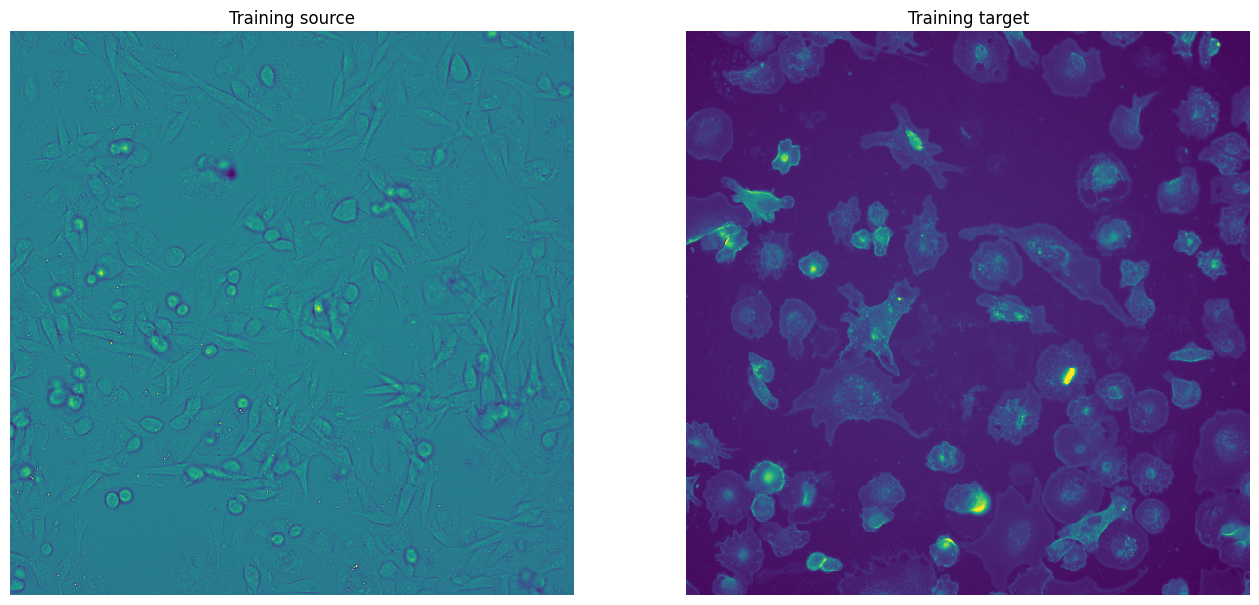

In [9]:
#@markdown ###Path to training images:

Training_source = "/home/ocb/HardDrive_4TB/EGM/MULTICHANNEL/DATA/merged/train/cho_ph" #@param {type:"string"}
InputFile = Training_source+"/*.png"

Training_target = "/home/ocb/HardDrive_4TB/EGM/MULTICHANNEL/DATA/merged/train/membrane" #@param {type:"string"}
OutputFile = Training_target+"/*.png"

#@markdown ###Type of images:

number_channels = "1" #@param ["1", "3"]

#@markdown ###Image normalisation:

Normalisation_training_source = "Contrast stretching" #@param ["None", "Contrast stretching", "Adaptive Equalization"]
Normalisation_training_target = "Contrast stretching" #@param ["None", "Contrast stretching", "Adaptive Equalization"]

#Define where the patch file will be saved
#base = "/content"
base = cyclegan_working_directory

# model name and path
#@markdown ###Name of the model and path to model folder:
model_name = "choph_membrane_cycleGAN_28092023" #@param {type:"string"}
model_path = "/home/ocb/HardDrive_4TB/EGM/MULTICHANNEL/CYCLEGAN/MODELS" #@param {type:"string"}

# other parameters for training.
#@markdown ###Training Parameters
#@markdown Number of epochs:
number_of_epochs =  100#@param {type:"number"}
assert number_of_epochs > 5, "Number of epochs should be greater than 5 in order to save model checkpoints."

#@markdown ###Advanced Parameters

Use_Default_Advanced_Parameters = False #@param {type:"boolean"}
#@markdown ###If not, please input:
patch_size =  512#@param {type:"number"} # in pixels
batch_size =  2#@param {type:"number"}
initial_learning_rate = 0.001 #@param {type:"number"}


if (Use_Default_Advanced_Parameters): 
  print("Default advanced parameters enabled")
  batch_size = 1
  patch_size =  512
  initial_learning_rate = 0.0002

#here we check that no model with the same name already exist, if so delete
if os.path.exists(model_path+'/'+model_name):
  print(bcolors.WARNING +"!! WARNING: "+model_name+" already exists and will be deleted in the following cell !!")
  print(bcolors.WARNING +"To continue training "+model_name+", choose a new model_name here, and load "+model_name+" in section 3.3")
  


#To use Cyclegan we need to organise the data in a way the model can understand
Saving_path= os.path.join(cyclegan_working_directory, model_name)
#Saving_path= model_path+"/"+model_name

if os.path.exists(Saving_path):
  shutil.rmtree(Saving_path)
os.makedirs(Saving_path)

TrainA_Folder = Saving_path+"/trainA"
if os.path.exists(TrainA_Folder):
  shutil.rmtree(TrainA_Folder)
os.makedirs(TrainA_Folder)
  
TrainB_Folder = Saving_path+"/trainB"
if os.path.exists(TrainB_Folder):
  shutil.rmtree(TrainB_Folder)
os.makedirs(TrainB_Folder)

# Here we disable pre-trained model by default (in case the  cell is not ran)
Use_pretrained_model = False

# Here we disable data augmentation by default (in case the cell is not ran)

Use_Data_augmentation = True


# This will display a randomly chosen dataset input and output
random_choice = random.choice(os.listdir(Training_source))
x = imageio.imread(Training_source+"/"+random_choice)


#Find image XY dimension
Image_Y = x.shape[0]
Image_X = x.shape[1]

Image_min_dim = min(Image_Y, Image_X)



#Hyperparameters failsafes
if patch_size > min(Image_Y, Image_X):
  patch_size = min(Image_Y, Image_X)
  print (bcolors.WARNING + " Your chosen patch_size is bigger than the xy dimension of your image; therefore the patch_size chosen is now:",patch_size)

# Here we check that patch_size is divisible by 4
if not patch_size % 4 == 0:
    patch_size = ((int(patch_size / 4)-1) * 4)
    print (bcolors.WARNING + " Your chosen patch_size is not divisible by 4; therefore the patch_size chosen is now:",patch_size)


random_choice_2 = random.choice(os.listdir(Training_target))
y = imageio.imread(Training_target+"/"+random_choice_2)

f=plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
plt.imshow(x, interpolation='nearest')
plt.title('Training source')
plt.axis('off');

plt.subplot(1,2,2)
plt.imshow(y, interpolation='nearest')
plt.title('Training target')
plt.axis('off');
plt.savefig(os.path.join(Saving_path, 'TrainingDataExample_cycleGAN.png'),bbox_inches='tight',pad_inches=0)


## **3.2. Data augmentation**
---
<font size = 4>

<font size = 4>Data augmentation can improve training progress by amplifying differences in the dataset. This can be useful if the available dataset is small since, in this case, it is possible that a network could quickly learn every example in the dataset (overfitting), without augmentation. Augmentation is not necessary for training and if your training dataset is large you should disable it.

<font size = 4>Data augmentation is performed here by flipping the patches. 

<font size = 4> By default data augmentation is enabled.

In [10]:
#Data augmentation

#@markdown ##Play this cell to enable or disable data augmentation: 

Use_Data_augmentation = True #@param {type:"boolean"}

if Use_Data_augmentation:
  print("Data augmentation enabled")

if not Use_Data_augmentation:
  print("Data augmentation disabled")

Data augmentation enabled



## **3.3. Using weights from a pre-trained model as initial weights**
---
<font size = 4>  Here, you can set the the path to a pre-trained model from which the weights can be extracted and used as a starting point for this training session. **This pre-trained model needs to be a CycleGAN model**. 

<font size = 4> This option allows you to perform training over multiple Colab runtimes or to do transfer learning using models trained outside of ZeroCostDL4Mic. **You do not need to run this section if you want to train a network from scratch**.

<font size = 4> In order to continue training from the point where the pre-trained model left off, it is adviseable to also **load the learning rate** that was used when the training ended. This is automatically saved for models trained with ZeroCostDL4Mic and will be loaded here. If no learning rate can be found in the model folder provided, the default learning rate will be used. 

In [11]:
# @markdown ##Loading weights from a pre-trained network


Use_pretrained_model = False #@param {type:"boolean"}


#@markdown ###If not, please provide the path to the model folder:
pretrained_model_path = "" #@param {type:"string"}

# --------------------- Check if we load a previously trained model ------------------------
if Use_pretrained_model:

  h5_file_path_A = os.path.join(pretrained_model_path, "latest_net_G_A.pth")
  h5_file_path_B = os.path.join(pretrained_model_path, "latest_net_G_B.pth")

# --------------------- Check the model exist ------------------------

  if not os.path.exists(h5_file_path_A) and os.path.exists(h5_file_path_B):
    print(bcolors.WARNING+'WARNING: Pretrained model does not exist')
    Use_pretrained_model = False
    print(bcolors.WARNING+'No pretrained network will be used.')

  if os.path.exists(h5_file_path_A) and os.path.exists(h5_file_path_B):
    print("Pretrained model "+os.path.basename(pretrained_model_path)+" was found and will be loaded prior to training.")
    
else:
  print(bcolors.WARNING+'No pretrained network will be used.')



No pretrained network will be used.


# **4. Train the network**
---

## **4.1. Prepare the training data for training**
---
<font size = 4>Here, we use the information from 3. to prepare the training data into a suitable format for training.

In [12]:
#@markdown ##Prepare the data for training

print("Data preparation in progress...")

if os.path.exists(model_path+'/'+model_name):
  shutil.rmtree(model_path+'/'+model_name)
os.makedirs(model_path+'/'+model_name)

#--------------- Here we move the files to trainA and train B ---------
print("Processing training source data...")
if Normalisation_training_source is not None:
    normalise_data(Training_source, Normalisation_training_source, TrainA_Folder)
else:
    for f in os.listdir(Training_source):
        shutil.copyfile(os.path.join(Training_source, f), os.path.join(TrainA_Folder, f))

print("Training source data already prepared")
print("Processing training target data...")
if Normalisation_training_target is not None:
    normalise_data(Training_target, Normalisation_training_target, TrainB_Folder)
else:
    for files in os.listdir(Training_target):
        shutil.copyfile(os.path.join(Training_target, f), os.path.join(TrainB_Folder, f))

print("Training target data already prepared")
#---------------------------------------------------------------------

# CycleGAN use number of EPOCH withouth lr decay and number of EPOCH with lr decay


number_of_epochs_lr_stable = int(number_of_epochs/2)
number_of_epochs_lr_decay = int(number_of_epochs/2)

if Use_pretrained_model :
  for f in os.listdir(pretrained_model_path):
    if (f.startswith("latest_net_")):      
      shutil.copyfile(pretrained_model_path+"/"+f, model_path+'/'+model_name+"/"+f)


pdf_export(augmentation = Use_Data_augmentation, pretrained_model = Use_pretrained_model)

print("Data ready for training")


Data preparation in progress...
Processing training source data...
Training source data already prepared
Processing training target data...


Ignoring width="50%" specified on a <td> that is not in the first <tr>
Ignoring width="50%" specified on a <td> that is not in the first <tr>
Ignoring width="50%" specified on a <td> that is not in the first <tr>
Ignoring width="50%" specified on a <td> that is not in the first <tr>
Ignoring width="50%" specified on a <td> that is not in the first <tr>
Ignoring width="50%" specified on a <td> that is not in the first <tr>
Ignoring width="50%" specified on a <td> that is not in the first <tr>
Ignoring width="50%" specified on a <td> that is not in the first <tr>


Training target data already prepared
Data ready for training


## **4.2. Start Training**
---
<font size = 4>When playing the cell below you should see updates after each epoch (round). Network training can take some time.

<font size = 4>* **CRITICAL NOTE:** Google Colab has a time limit for processing (to prevent using GPU power for datamining). Training time must be less than 12 hours! If training takes longer than 12 hours, please decrease the number of epochs or number of patches or continue the training in a second Colab session.

<font size = 4>Once training is complete, the trained model is automatically saved on your Google Drive, in the **model_path** folder that was selected in Section 3. It is however wise to download the folder from Google Drive as all data can be erased at the next training if using the same folder.

In [11]:

#@markdown ##Start training

start = time.time()

#--------------------------------- Command line inputs to change CycleGAN paramaters------------

       # basic parameters
        #('--dataroot', required=True, help='path to images (should have subfolders trainA, trainB, valA, valB, etc)')
        #('--name', type=str, default='experiment_name', help='name of the experiment. It decides where to store samples and models')
        #('--gpu_ids', type=str, default='0', help='gpu ids: e.g. 0  0,1,2, 0,2. use -1 for CPU')
        #('--checkpoints_dir', type=str, default='./checkpoints', help='models are saved here')
       
       # model parameters
        #('--model', type=str, default='cycle_gan', help='chooses which model to use. [cycle_gan | pix2pix | test | colorization]')
        #('--input_nc', type=int, default=3, help='# of input image channels: 3 for RGB and 1 for grayscale')
        #('--output_nc', type=int, default=3, help='# of output image channels: 3 for RGB and 1 for grayscale')
        #('--ngf', type=int, default=64, help='# of gen filters in the last conv layer')
        #('--ndf', type=int, default=64, help='# of discrim filters in the first conv layer')
        #('--netD', type=str, default='basic', help='specify discriminator architecture [basic | n_layers | pixel]. The basic model is a 70x70 PatchGAN. n_layers allows you to specify the layers in the discriminator')
        #('--netG', type=str, default='resnet_9blocks', help='specify generator architecture [resnet_9blocks | resnet_6blocks | unet_256 | unet_128]')
        #('--n_layers_D', type=int, default=3, help='only used if netD==n_layers')
        #('--norm', type=str, default='instance', help='instance normalization or batch normalization [instance | batch | none]')
        #('--init_type', type=str, default='normal', help='network initialization [normal | xavier | kaiming | orthogonal]')
        #('--init_gain', type=float, default=0.02, help='scaling factor for normal, xavier and orthogonal.')
        #('--no_dropout', action='store_true', help='no dropout for the generator')
        
       # dataset parameters
        #('--dataset_mode', type=str, default='unaligned', help='chooses how datasets are loaded. [unaligned | aligned | single | colorization]')
        #('--direction', type=str, default='AtoB', help='AtoB or BtoA')
        #('--serial_batches', action='store_true', help='if true, takes images in order to make batches, otherwise takes them randomly')
        #('--num_threads', default=4, type=int, help='# threads for loading data')
        #('--batch_size', type=int, default=1, help='input batch size')
        #('--load_size', type=int, default=286, help='scale images to this size')
        #('--crop_size', type=int, default=256, help='then crop to this size')
        #('--max_dataset_size', type=int, default=float("inf"), help='Maximum number of samples allowed per dataset. If the dataset directory contains more than max_dataset_size, only a subset is loaded.')
        #('--preprocess', type=str, default='resize_and_crop', help='scaling and cropping of images at load time [resize_and_crop | crop | scale_width | scale_width_and_crop | none]')
        #('--no_flip', action='store_true', help='if specified, do not flip the images for data augmentation')
        #('--display_winsize', type=int, default=256, help='display window size for both visdom and HTML')
        
       # additional parameters
        #('--epoch', type=str, default='latest', help='which epoch to load? set to latest to use latest cached model')
        #('--load_iter', type=int, default='0', help='which iteration to load? if load_iter > 0, the code will load models by iter_[load_iter]; otherwise, the code will load models by [epoch]')
        #('--verbose', action='store_true', help='if specified, print more debugging information')
        #('--suffix', default='', type=str, help='customized suffix: opt.name = opt.name + suffix: e.g., {model}_{netG}_size{load_size}')
        
       # visdom and HTML visualization parameters
        #('--display_freq', type=int, default=400, help='frequency of showing training results on screen')
        #('--display_ncols', type=int, default=4, help='if positive, display all images in a single visdom web panel with certain number of images per row.')
        #('--display_id', type=int, default=1, help='window id of the web display')
        #('--display_server', type=str, default="http://localhost", help='visdom server of the web display')
        #('--display_env', type=str, default='main', help='visdom display environment name (default is "main")')
        #('--display_port', type=int, default=8097, help='visdom port of the web display')
        #('--update_html_freq', type=int, default=1000, help='frequency of saving training results to html')
        #('--print_freq', type=int, default=100, help='frequency of showing training results on console')
        #('--no_html', action='store_true', help='do not save intermediate training results to [opt.checkpoints_dir]/[opt.name]/web/')
        
       # network saving and loading parameters
        #('--save_latest_freq', type=int, default=5000, help='frequency of saving the latest results')
        #('--save_epoch_freq', type=int, default=5, help='frequency of saving checkpoints at the end of epochs')
        #('--save_by_iter', action='store_true', help='whether saves model by iteration')
        #('--continue_train', action='store_true', help='continue training: load the latest model')
        #('--epoch_count', type=int, default=1, help='the starting epoch count, we save the model by <epoch_count>, <epoch_count>+<save_latest_freq>, ...')
        #('--phase', type=str, default='train', help='train, val, test, etc')
        
       # training parameters
        #('--n_epochs', type=int, default=100, help='number of epochs with the initial learning rate')
        #('--n_epochs_decay', type=int, default=100, help='number of epochs to linearly decay learning rate to zero')
        #('--beta1', type=float, default=0.5, help='momentum term of adam')
        #('--lr', type=float, default=0.0002, help='initial learning rate for adam')
        #('--gan_mode', type=str, default='lsgan', help='the type of GAN objective. [vanilla| lsgan | wgangp]. vanilla GAN loss is the cross-entropy objective used in the original GAN paper.')
        #('--pool_size', type=int, default=50, help='the size of image buffer that stores previously generated images')
        #('--lr_policy', type=str, default='linear', help='learning rate policy. [linear | step | plateau | cosine]')
        #('--lr_decay_iters', type=int, default=50, help='multiply by a gamma every lr_decay_iters iterations'

#---------------------------------------------------------
# get number of channels
if number_channels == "1":
    nc = 1
elif number_channels == "3":
    nc = 3
    
#----- Start the training ------------------------------------
if not Use_pretrained_model:
  if Use_Data_augmentation:
    !python pytorch-CycleGAN-and-pix2pix/train.py --dataroot "$Saving_path" --input_nc "$nc" --output_nc "$nc" --name "$model_name" --model cycle_gan --batch_size $batch_size --preprocess scale_width_and_crop --load_size $Image_min_dim --crop_size $patch_size --checkpoints_dir "$model_path"  --no_html --n_epochs $number_of_epochs_lr_stable --n_epochs_decay $number_of_epochs_lr_decay --lr $initial_learning_rate --display_id 0 --save_epoch_freq 5
  if not Use_Data_augmentation:
    !python pytorch-CycleGAN-and-pix2pix/train.py --dataroot "$Saving_path" --input_nc "$nc" --output_nc "$nc" --name "$model_name" --model cycle_gan --batch_size $batch_size --preprocess scale_width_and_crop --load_size $Image_min_dim --crop_size $patch_size --checkpoints_dir "$model_path"  --no_html --n_epochs $number_of_epochs_lr_stable --n_epochs_decay $number_of_epochs_lr_decay --lr $initial_learning_rate --display_id 0 --save_epoch_freq 5 --no_flip

if Use_pretrained_model:
  if Use_Data_augmentation:
    !python pytorch-CycleGAN-and-pix2pix/train.py --dataroot "$Saving_path" --input_nc "$nc" --output_nc "$nc" --name "$model_name" --model cycle_gan --batch_size $batch_size --preprocess scale_width_and_crop --load_size $Image_min_dim --crop_size $patch_size --checkpoints_dir "$model_path"  --no_html --n_epochs $number_of_epochs_lr_stable --n_epochs_decay $number_of_epochs_lr_decay --lr $initial_learning_rate --display_id 0 --save_epoch_freq 5 --continue_train
  
  if not Use_Data_augmentation:
    !python pytorch-CycleGAN-and-pix2pix/train.py --dataroot "$Saving_path" --input_nc "$nc" --output_nc "$nc" --name "$model_name" --model cycle_gan --batch_size $batch_size --preprocess scale_width_and_crop --load_size $Image_min_dim --crop_size $patch_size --checkpoints_dir "$model_path"  --no_html --n_epochs $number_of_epochs_lr_stable --n_epochs_decay $number_of_epochs_lr_decay --lr $initial_learning_rate --display_id 0 --save_epoch_freq 5 --continue_train --no_flip

#---------------------------------------------------------

print("Training, done.")

# Displaying the time elapsed for training
dt = time.time() - start
mins, sec = divmod(dt, 60) 
hour, mins = divmod(mins, 60) 
print("Time elapsed:",hour, "hour(s)",mins,"min(s)",round(sec),"sec(s)")

# Save training summary as pdf

pdf_export(trained = True, augmentation = Use_Data_augmentation, pretrained_model = Use_pretrained_model)

----------------- Options ---------------
               batch_size: 2                             	[default: 1]
                    beta1: 0.5                           
          checkpoints_dir: /home/ocb/HardDrive_4TB/EGM/MULTICHANNEL/CYCLEGAN/MODELS	[default: ./checkpoints]
           continue_train: False                         
                crop_size: 512                           	[default: 256]
                 dataroot: /home/ocb/HardDrive_4TB/EGM/MULTICHANNEL/CYCLEGAN/MODELS/working_dir/choph_membrane_cycleGAN_28092023	[default: None]
             dataset_mode: unaligned                     
                direction: AtoB                          
              display_env: main                          
             display_freq: 400                           
               display_id: 0                             	[default: 1]
            display_ncols: 4                             
             display_port: 8097                          
           display_server

Ignoring width="50%" specified on a <td> that is not in the first <tr>
Ignoring width="50%" specified on a <td> that is not in the first <tr>
Ignoring width="50%" specified on a <td> that is not in the first <tr>
Ignoring width="50%" specified on a <td> that is not in the first <tr>
Ignoring width="50%" specified on a <td> that is not in the first <tr>
Ignoring width="50%" specified on a <td> that is not in the first <tr>
Ignoring width="50%" specified on a <td> that is not in the first <tr>
Ignoring width="50%" specified on a <td> that is not in the first <tr>


Training, done.
Time elapsed: 1.0 hour(s) 23.0 min(s) 20 sec(s)


# **5. Evaluate your model**
---

<font size = 4>This section allows the user to perform important quality checks on the validity and generalisability of the trained model. 

<font size = 4>**We highly recommend to perform quality control on all newly trained models.**

<font size = 4>Unfortunately loss functions curve are not very informative for GAN network. Therefore we perform the QC here using a test dataset.








## **5.1. Choose the model you want to assess**

In [5]:
# model name and path
#@markdown ###Do you want to assess the model you just trained ?
Use_the_current_trained_model = False #@param {type:"boolean"}

#@markdown ###If not, please provide the path to the model folder:

QC_model_folder = "/home/ocb/HardDrive_4TB/EGM/MULTICHANNEL/CYCLEGAN/MODELS/choph_membrane_cycleGAN_28092023" #@param {type:"string"}

#Here we define the loaded model name and path
QC_model_name = os.path.basename(QC_model_folder)
QC_model_path = os.path.dirname(QC_model_folder)

if (Use_the_current_trained_model): 
  QC_model_name = model_name
  QC_model_path = model_path

full_QC_model_path = QC_model_path+'/'+QC_model_name+'/'
if os.path.exists(full_QC_model_path):
  print("The "+QC_model_name+" network will be evaluated")
else:
  W  = '\033[0m'  # white (normal)
  R  = '\033[31m' # red
  print(R+'!! WARNING: The chosen model does not exist !!'+W)
  print('Please make sure you provide a valid model path and model name before proceeding further.')


The choph_membrane_cycleGAN_28092023 network will be evaluated


## **5.2. Identify the best checkpoint to use to make predictions**

<font size = 4> CycleGAN save model checkpoints every five epochs. Due to the stochastic nature of GAN networks, the last checkpoint is not always the best one to use. As a consequence, it can be challenging to choose the most suitable checkpoint to use to make predictions.

<font size = 4>This section allows you to perform predictions using all the saved checkpoints and to estimate the quality of these predictions by comparing them to the provided ground truths images. Metric used include:

<font size = 4>**1. The SSIM (structural similarity) map** 

<font size = 4>The SSIM metric is used to evaluate whether two images contain the same structures. It is a normalized metric and an SSIM of 1 indicates a perfect similarity between two images. Therefore for SSIM, the closer to 1, the better. The SSIM maps are constructed by calculating the SSIM metric in each pixel by considering the surrounding structural similarity in the neighbourhood of that pixel (currently defined as window of 11 pixels and with Gaussian weighting of 1.5 pixel standard deviation, see our Wiki for more info). 

<font size=4>**mSSIM** is the SSIM value calculated across the entire window of both images.

<font size=4>**The output below shows the SSIM maps with the mSSIM**

<font size = 4>**2. The RSE (Root Squared Error) map** 

<font size = 4>This is a display of the root of the squared difference between the normalized predicted and target or the source and the target. In this case, a smaller RSE is better. A perfect agreement between target and prediction will lead to an RSE map showing zeros everywhere (dark).


<font size =4>**NRMSE (normalised root mean squared error)** gives the average difference between all pixels in the images compared to each other. Good agreement yields low NRMSE scores.

<font size = 4>**PSNR (Peak signal-to-noise ratio)** is a metric that gives the difference between the ground truth and prediction (or source input) in decibels, using the peak pixel values of the prediction and the MSE between the images. The higher the score the better the agreement.

<font size=4>**The output below shows the RSE maps with the NRMSE and PSNR values.**



Processing QC source data...
Done
Processing QC target data...
Done
18
The checkpoint currently analysed is =10
----------------- Options ---------------
             aspect_ratio: 1.0                           
               batch_size: 1                             
          checkpoints_dir: /home/ocb/HardDrive_4TB/EGM/MULTICHANNEL/CYCLEGAN/MODELS/working_dir/	[default: ./checkpoints]
                crop_size: 1200                          	[default: 256]
                 dataroot: /home/ocb/HardDrive_4TB/EGM/MULTICHANNEL/CYCLEGAN/MODELS/working_dir/choph_membrane_cycleGAN_28092023_QC_images	[default: None]
             dataset_mode: single                        
                direction: AtoB                          
          display_winsize: 256                           
                    epoch: 10                            	[default: latest]
                     eval: False                         
                  gpu_ids: 0                             
              

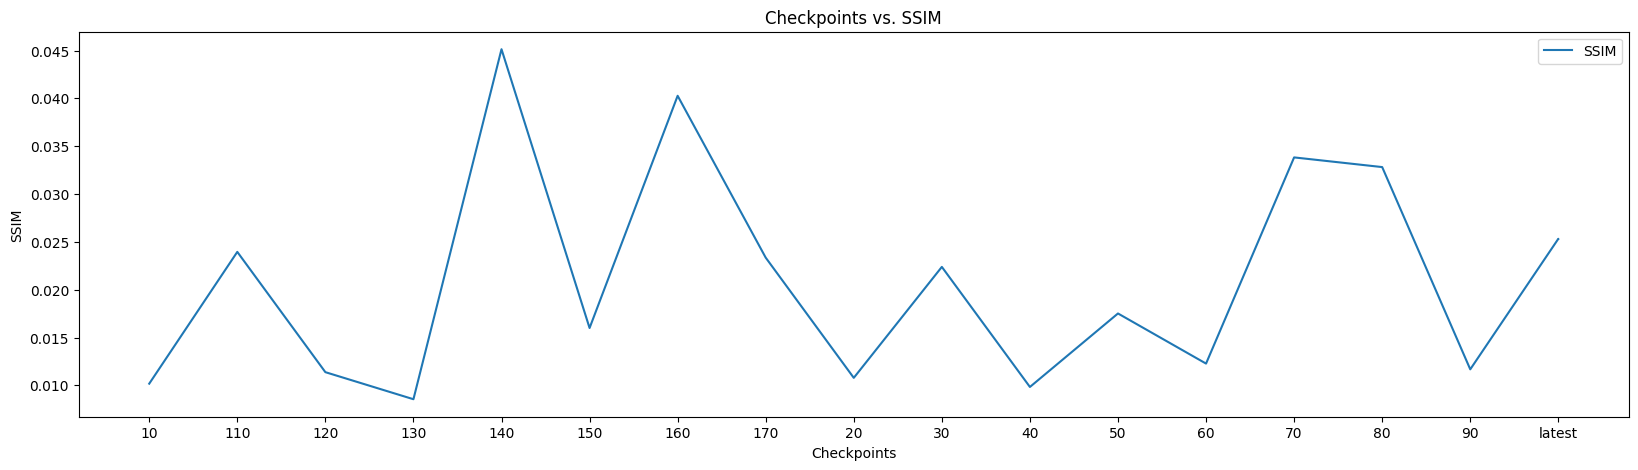

interactive(children=(Dropdown(description='file', options=('_20230629_unsync_475_night_Individual_unsync_CHO_…

FileNotFoundError: No such file: '/home/ocb/HardDrive_4TB/EGM/MULTICHANNEL/CYCLEGAN/MODELS/choph_membrane_cycleGAN_28092023/Quality Control/QC_example_data.png'

In [8]:
#@markdown ##Choose the folders that contain your Quality Control dataset

Source_QC_folder = "/home/ocb/HardDrive_4TB/EGM/MULTICHANNEL/DATA/merged/test/cho_ph" #@param{type:"string"}
Target_QC_folder = "/home/ocb/HardDrive_4TB/EGM/MULTICHANNEL/DATA/merged/test/cho_ph" #@param {type:"string"}
#OutputFile = Target_QC_folder+"/*.png"
#Target_QC_folder = "" #@param{type:"string"}

Image_type = "Grayscale" #@param ["Grayscale", "RGB"]\
if Image_type is "Grayscale":
    nc = 1
else:
    nc = 3
Normalisation_test_source = "Contrast stretching" #@param ["None", "Contrast stretching", "Adaptive Equalization"]
Normalisation_test_target = "Contrast stretching" #@param ["None", "Contrast stretching", "Adaptive Equalization"]

# average function
def Average(lst): 
    return sum(lst) / len(lst) 


# Create a quality control folder

if os.path.exists(QC_model_path+"/"+QC_model_name+"/Quality Control"):
  shutil.rmtree(QC_model_path+"/"+QC_model_name+"/Quality Control")

os.makedirs(QC_model_path+"/"+QC_model_name+"/Quality Control")

# List images in Source_QC_folder
# This will find the image dimension of a randomly choosen image in Source_QC_folder 
random_choice = random.choice(os.listdir(Source_QC_folder))
x = imageio.imread(Source_QC_folder+"/"+random_choice)

#Find image XY dimension
Image_Y = x.shape[0]
Image_X = x.shape[1]

Image_min_dim = min(Image_Y, Image_X)


# Here we need to move the data to be analysed so that cycleGAN can find them

#Saving_path_QC= "/content/"+QC_model_name
Saving_path_QC = os.path.join(cyclegan_working_directory, QC_model_name)

if os.path.exists(Saving_path_QC):
  shutil.rmtree(Saving_path_QC)
os.makedirs(Saving_path_QC)

Saving_path_QC_folder = Saving_path_QC+"_QC_images"

if os.path.exists(Saving_path_QC_folder):
  shutil.rmtree(Saving_path_QC_folder)
os.makedirs(Saving_path_QC_folder)

imageA_folder = os.path.join(Saving_path_QC_folder, "testA")
imageB_folder = os.path.join(Saving_path_QC_folder, "testB")

os.makedirs(imageA_folder)
os.makedirs(imageB_folder)

# Here we copy all the test input images normalised
print("Processing QC source data...")
if Normalisation_test_source is not None:
    normalise_data(Source_QC_folder, Normalisation_test_source, imageA_folder)
else:
    for f in os.listdir(Source_QC_folder):
        shutil.copyfile(os.path.join(Source_QC_folder, f), os.path.join(imageA_folder, f))
print("Done")

print("Processing QC target data...")
if Normalisation_test_target is not None:
    normalise_data(Target_QC_folder, Normalisation_test_target, imageB_folder)
else:
    for f in os.listdir(Target_QC_folder):
        shutil.copyfile(os.path.join(Target_QC_folder, f), os.path.join(imageB_folder, f))
print("Done")

#Here we copy and rename all the checkpoints to be analysed
for f in os.listdir(full_QC_model_path):
  shortname = f[:-6]
  shortname = shortname + ".pth"
  if f.endswith("net_G_A.pth"):
    shutil.copyfile(full_QC_model_path+f, Saving_path_QC+"/"+shortname)

# This will find the image dimension of a randomly chosen image in Source_QC_folder 
random_choice = random.choice(os.listdir(imageA_folder))
x = imageio.imread(imageA_folder+"/"+random_choice)

#Find image XY dimension
Image_Y = x.shape[0]
Image_X = x.shape[1]

Image_min_dim = int(min(Image_Y, Image_X))
#Nb_Checkpoint = len(os.listdir(Saving_path_QC))
Checkpoints2assess = [m for m in os.listdir(Saving_path_QC) if m.endswith("net_G.pth")]
Checkpoints2assess = Checkpoints2assess.sort()

Nb_Checkpoint = len(Checkpoints2assess)
print(Nb_Checkpoint)
Nb_files_Data_folder = len(os.listdir(imageA_folder))

## Initiate list
Checkpoint_list = []
Average_ssim_score_list = []

for j in range(1, Nb_Checkpoint+1):
  #checkpoints = j
  #if j == Nb_Checkpoint:
  #  checkpoints = "latest"
  checkpoints = Checkpoints2assess[j][:-len("_net_G.pth")]
  print("The checkpoint currently analysed is ="+str(checkpoints))

  Checkpoint_list.append(checkpoints)
  # Create a quality control/Prediction Folder
  QC_prediction_results = os.path.join(QC_model_path, QC_model_name, "Quality Control", str(checkpoints))

  if os.path.exists(QC_prediction_results):
    shutil.rmtree(QC_prediction_results)
  os.makedirs(QC_prediction_results)
    
#---------------------------- Predictions are performed here ----------------------

  !python pytorch-CycleGAN-and-pix2pix/test.py --dataroot "$Saving_path_QC_folder" --name "$QC_model_name" --model test  --direction AtoB --num_test "$Nb_files_Data_folder" --input_nc "$nc" --output_nc "$nc" --epoch $checkpoints --no_dropout --preprocess scale_width --load_size $Image_min_dim --crop_size $Image_min_dim --results_dir "$QC_prediction_results" --checkpoints_dir "$cyclegan_working_directory"
#-----------------------------------------------------------------------------------

#Here we need to move the data again and remove all the unnecessary folders

  Checkpoint_name = "test_"+str(checkpoints)
  QC_results_images = os.path.join(QC_prediction_results, QC_model_name, Checkpoint_name, "images")
  QC_results_images_files = os.listdir(QC_results_images)

  for f in QC_results_images_files:  
    shutil.copyfile(os.path.join(QC_results_images, f), os.path.join(QC_prediction_results, f))

  #Here we clean up the extra files
  shutil.rmtree(os.path.join(QC_prediction_results, QC_model_name))

  QC_checkpoint_folder = os.path.join(QC_model_path, QC_model_name, "Quality Control", str(checkpoints))

#-------------------------------- QC for RGB ------------------------------------

  if Image_type == "RGB":
# List images in Source_QC_folder
# This will find the image dimension of a randomly choosen image in Source_QC_folder 
    random_choice = random.choice(os.listdir(imageA_folder))
    x = imageio.imread(os.path.join(imageA_folder, random_choice))

    def ssim(img1, img2):
      return structural_similarity(img1,img2,data_range=1.,full=True, multichannel=True)

# Open and create the csv file that will contain all the QC metrics
    with open(os.path.join(QC_checkpoint_folder, "QC_metrics_"+QC_model_name+str(checkpoints)+".csv"), "w", newline='') as file:
        writer = csv.writer(file)
    # Write the header in the csv file
        writer.writerow(["image #","Prediction v. GT mSSIM","Input v. GT mSSIM"])
    # Initiate list
        ssim_score_list = []  
    # Let's loop through the provided dataset in the QC folders
        for i in os.listdir(Source_QC_folder):
          if not os.path.isdir(os.path.join(Source_QC_folder,i)):
            print('Running QC on: '+i)
            shortname_no_PNG = i[:-4]
      # -------------------------------- Target test data (Ground truth) --------------------------------
            test_GT = imageio.imread(os.path.join(imageB_folder, i), as_gray=False, pilmode="RGB")

      # -------------------------------- Source test data --------------------------------
            test_source = imageio.imread(os.path.join(QC_checkpoint_folder,shortname_no_PNG+"_real.png"))
      # -------------------------------- Prediction --------------------------------
      
            test_prediction = imageio.imread(os.path.join(QC_checkpoint_folder,shortname_no_PNG+"_fake.png"))
          
      #--------------------------- Here we normalise using histograms matching--------------------------------
            test_prediction_matched = match_histograms(test_prediction, test_GT, multichannel=True)
            test_source_matched = match_histograms(test_source, test_GT, multichannel=True)
            
      # -------------------------------- Calculate the metric maps and save them --------------------------------

      # Calculate the SSIM maps
            index_SSIM_GTvsPrediction, img_SSIM_GTvsPrediction = ssim(test_GT, test_prediction_matched)
            index_SSIM_GTvsSource, img_SSIM_GTvsSource = ssim(test_GT, test_source_matched)

            ssim_score_list.append(index_SSIM_GTvsPrediction)

      #Save ssim_maps
            img_SSIM_GTvsPrediction_8bit = (img_SSIM_GTvsPrediction* 255).astype("uint8")
            io.imsave(os.path.join(QC_checkpoint_folder, "SSIM_GTvsPrediction_"+shortname_no_PNG+'.tif'),img_SSIM_GTvsPrediction_8bit)
            img_SSIM_GTvsSource_8bit = (img_SSIM_GTvsSource* 255).astype("uint8")
            io.imsave(os.path.join(QC_checkpoint_folder, "SSIM_GTvsSource_"+shortname_no_PNG+'.tif'),img_SSIM_GTvsSource_8bit)
            writer.writerow([i,str(index_SSIM_GTvsPrediction),str(index_SSIM_GTvsSource)])

      #Here we calculate the ssim average for each image in each checkpoints
        Average_SSIM_checkpoint = Average(ssim_score_list)
        Average_ssim_score_list.append(Average_SSIM_checkpoint)

#------------------------------------------- QC for Grayscale ----------------------------------------------

  if Image_type == "Grayscale":
    def ssim(img1, img2):
      return structural_similarity(img1,img2,data_range=1.,full=True, gaussian_weights=True, use_sample_covariance=False, sigma=1.5)
    def normalize(x, pmin=3, pmax=99.8, axis=None, clip=False, eps=1e-20, dtype=np.float32):
      mi = np.percentile(x,pmin,axis=axis,keepdims=True)
      ma = np.percentile(x,pmax,axis=axis,keepdims=True)
      return normalize_mi_ma(x, mi, ma, clip=clip, eps=eps, dtype=dtype)

    def normalize_mi_ma(x, mi, ma, clip=False, eps=1e-20, dtype=np.float32):#dtype=np.float32
  
      if dtype is not None:
        x   = x.astype(dtype,copy=False)
        mi  = dtype(mi) if np.isscalar(mi) else mi.astype(dtype,copy=False)
        ma  = dtype(ma) if np.isscalar(ma) else ma.astype(dtype,copy=False)
        eps = dtype(eps)

        try:
            import numexpr
            x = numexpr.evaluate("(x - mi) / ( ma - mi + eps )")
        except ImportError:
            x =                   (x - mi) / ( ma - mi + eps )

        if clip:
            x = np.clip(x,0,1)

        return x

    def norm_minmse(gt, x, normalize_gt=True):
    
      if normalize_gt:
        gt = normalize(gt, 0.1, 99.9, clip=False).astype(np.float32, copy = False)
        x = x.astype(np.float32, copy=False) - np.mean(x)
        #x = x - np.mean(x)
        gt = gt.astype(np.float32, copy=False) - np.mean(gt)
        #gt = gt - np.mean(gt)
        scale = np.cov(x.flatten(), gt.flatten())[0, 1] / np.var(x.flatten())
        return gt, scale * x

# Open and create the csv file that will contain all the QC metrics
    with open(os.path.join(QC_checkpoint_folder, "QC_metrics_"+QC_model_name+str(checkpoints)+".csv"), "w", newline='') as file:
        writer = csv.writer(file)

    # Write the header in the csv file
        writer.writerow(["image #","Prediction v. GT mSSIM","Input v. GT mSSIM", "Prediction v. GT NRMSE", "Input v. GT NRMSE", "Prediction v. GT PSNR", "Input v. GT PSNR"])  
    # Let's loop through the provided dataset in the QC folders
        for i in os.listdir(imageA_folder):
          if not os.path.isdir(os.path.join(imageA_folder,i)):
            print('Running QC on: '+i)
            ssim_score_list = []
            shortname_no_PNG = i[:-4]
      # -------------------------------- Target test data (Ground truth) --------------------------------
            test_GT_raw = imageio.imread(os.path.join(imageB_folder, i), as_gray=False, pilmode="RGB")
          
            test_GT = test_GT_raw[:,:,2]

      # -------------------------------- Source test data --------------------------------
            test_source_raw = imageio.imread(os.path.join(QC_checkpoint_folder,shortname_no_PNG+"_real.png"))
            test_source = test_source_raw[:,:,2]

      # Normalize the images wrt each other by minimizing the MSE between GT and Source image
            test_GT_norm,test_source_norm = norm_minmse(test_GT, test_source, normalize_gt=True)

      # -------------------------------- Prediction --------------------------------
            test_prediction_raw = imageio.imread(os.path.join(QC_checkpoint_folder,shortname_no_PNG+"_fake.png"))
            test_prediction = test_prediction_raw[:,:,2]

      # Normalize the images wrt each other by minimizing the MSE between GT and prediction
            test_GT_norm,test_prediction_norm = norm_minmse(test_GT, test_prediction, normalize_gt=True)        
      # -------------------------------- Calculate the metric maps and save them --------------------------------

      # Calculate the SSIM maps
            index_SSIM_GTvsPrediction, img_SSIM_GTvsPrediction = ssim(test_GT_norm, test_prediction_norm)
            index_SSIM_GTvsSource, img_SSIM_GTvsSource = ssim(test_GT_norm, test_source_norm)

            ssim_score_list.append(index_SSIM_GTvsPrediction)

      #Save ssim_maps
          
            img_SSIM_GTvsPrediction_8bit = (img_SSIM_GTvsPrediction* 255).astype("uint8")
            io.imsave(os.path.join(QC_checkpoint_folder, "SSIM_GTvsPrediction_"+shortname_no_PNG+'.tif'), img_SSIM_GTvsPrediction_8bit)
            img_SSIM_GTvsSource_8bit = (img_SSIM_GTvsSource* 255).astype("uint8")
            io.imsave(os.path.join(QC_checkpoint_folder, "SSIM_GTvsSource_"+shortname_no_PNG+'.tif'), img_SSIM_GTvsSource_8bit)
      
      # Calculate the Root Squared Error (RSE) maps
            img_RSE_GTvsPrediction = np.sqrt(np.square(test_GT_norm - test_prediction_norm))
            img_RSE_GTvsSource = np.sqrt(np.square(test_GT_norm - test_source_norm))

      # Save SE maps
            img_RSE_GTvsPrediction_8bit = (img_RSE_GTvsPrediction* 255).astype("uint8")
            io.imsave(os.path.join(QC_checkpoint_folder, "RSE_GTvsPrediction_"+shortname_no_PNG+'.tif'), img_RSE_GTvsPrediction_8bit)
            img_RSE_GTvsSource_8bit = (img_RSE_GTvsSource* 255).astype("uint8")
            io.imsave(os.path.join(QC_checkpoint_folder, "RSE_GTvsSource_"+shortname_no_PNG+'.tif'), img_RSE_GTvsSource_8bit)


      # -------------------------------- Calculate the RSE metrics and save them --------------------------------

      # Normalised Root Mean Squared Error (here it's valid to take the mean of the image)
            NRMSE_GTvsPrediction = np.sqrt(np.mean(img_RSE_GTvsPrediction))
            NRMSE_GTvsSource = np.sqrt(np.mean(img_RSE_GTvsSource))
        
      # We can also measure the peak signal to noise ratio between the images
            PSNR_GTvsPrediction = psnr(test_GT_norm,test_prediction_norm,data_range=1.0)
            PSNR_GTvsSource = psnr(test_GT_norm,test_source_norm,data_range=1.0)

            writer.writerow([i,str(index_SSIM_GTvsPrediction),str(index_SSIM_GTvsSource),str(NRMSE_GTvsPrediction),str(NRMSE_GTvsSource),str(PSNR_GTvsPrediction),str(PSNR_GTvsSource)])

          #Here we calculate the ssim average for each image in each checkpoints

        Average_SSIM_checkpoint = Average(ssim_score_list)
        Average_ssim_score_list.append(Average_SSIM_checkpoint)


# All data is now processed saved
  

# -------------------------------- Display --------------------------------
Checkpoint_list_num = [int(x) for x in Checkpoint_list if x != 'latest']
Average_ssim_score_list_num = [float(x) for y, x in zip(Checkpoint_list, Average_ssim_score_list) if y != 'latest']
Average_ssim_score_list_num = [x for _, x in sorted(zip(Checkpoint_list_num, Average_ssim_score_list_num))]
Checkpoint_list_num.sort()
Checkpoint_list_num.append(Checkpoint_list_num[-1])
Average_ssim_score_list_num.append(Average_ssim_score_list[-1])

# Display the IoV vs Threshold plot
plt.figure(figsize=(20,5))
plt.plot(Checkpoint_list_num, Average_ssim_score_list_num, label="SSIM")
plt.title('Checkpoints vs. SSIM')
plt.ylabel('SSIM')
plt.xlabel('Checkpoints')
plt.legend()
plt.savefig(os.path.join(full_QC_model_path, 'Quality Control', 'SSIMvsCheckpoint_data.png'),bbox_inches='tight',pad_inches=0)
plt.show()



# -------------------------------- Display RGB --------------------------------

from ipywidgets import interact
import ipywidgets as widgets


if Image_type == "RGB":
  random_choice_shortname_no_PNG = shortname_no_PNG

  @interact
  def show_results(file=os.listdir(imageA_folder), checkpoints=Checkpoint_list):

    random_choice_shortname_no_PNG = file[:-4]

    QC_checkpoint_folder = os.path.join(QC_model_path, QC_model_name, "Quality Control", str(checkpoints))

    df1 = pd.read_csv(os.path.join(QC_checkpoint_folder, "QC_metrics_"+QC_model_name+str(checkpoints)+".csv"), header=0)
    df2 = df1.set_index("image #", drop = False)
    index_SSIM_GTvsPrediction = df2.loc[file, "Prediction v. GT mSSIM"]
    index_SSIM_GTvsSource = df2.loc[file, "Input v. GT mSSIM"]

#Setting up colours
    
    cmap = None

    plt.figure(figsize=(10,10))

# Target (Ground-truth)
    plt.subplot(3,3,1)
    plt.axis('off')
    img_GT = imageio.imread(os.path.join(imageB_folder, file), as_gray=False, pilmode="RGB")
    plt.imshow(img_GT, cmap = cmap)
    plt.title('Target',fontsize=15)

# Source
    plt.subplot(3,3,2)
    plt.axis('off')
    img_Source = imageio.imread(os.path.join(imageA_folder, file), as_gray=False, pilmode="RGB")
    plt.imshow(img_Source, cmap = cmap)
    plt.title('Source',fontsize=15)

#Prediction
    plt.subplot(3,3,3)
    plt.axis('off')

    img_Prediction = io.imread(os.path.join(QC_checkpoint_folder, random_choice_shortname_no_PNG+"_fake.png"))

    plt.imshow(img_Prediction, cmap = cmap)
    plt.title('Prediction',fontsize=15)


#SSIM between GT and Source
    plt.subplot(3,3,5)
#plt.axis('off')
    plt.tick_params(
      axis='both',      # changes apply to the x-axis and y-axis
      which='both',      # both major and minor ticks are affected
      bottom=False,      # ticks along the bottom edge are off
      top=False,        # ticks along the top edge are off
      left=False,       # ticks along the left edge are off
      right=False,         # ticks along the right edge are off
      labelbottom=False,
      labelleft=False)

    img_SSIM_GTvsSource = imageio.imread(os.path.join(QC_checkpoint_folder, "SSIM_GTvsSource_"+random_choice_shortname_no_PNG+".tif"))

    imSSIM_GTvsSource = plt.imshow(img_SSIM_GTvsSource, cmap = cmap, vmin=0, vmax=1)
#plt.colorbar(imSSIM_GTvsSource,fraction=0.046, pad=0.04)
    plt.title('Target vs. Source',fontsize=15)
    plt.xlabel('mSSIM: '+str(round(index_SSIM_GTvsSource,3)),fontsize=14)
    plt.ylabel('SSIM maps',fontsize=20, rotation=0, labelpad=75)

#SSIM between GT and Prediction
    plt.subplot(3,3,6)
#plt.axis('off')
    plt.tick_params(
      axis='both',      # changes apply to the x-axis and y-axis
      which='both',      # both major and minor ticks are affected
      bottom=False,      # ticks along the bottom edge are off
      top=False,        # ticks along the top edge are off
      left=False,       # ticks along the left edge are off
      right=False,         # ticks along the right edge are off
      labelbottom=False,
      labelleft=False) 

    img_SSIM_GTvsPrediction = imageio.imread(os.path.join(QC_checkpoint_folder, "SSIM_GTvsPrediction_"+random_choice_shortname_no_PNG+".tif"))

    imSSIM_GTvsPrediction = plt.imshow(img_SSIM_GTvsPrediction, cmap = cmap, vmin=0,vmax=1)
#plt.colorbar(imSSIM_GTvsPrediction,fraction=0.046, pad=0.04)
    plt.title('Target vs. Prediction',fontsize=15)
    plt.xlabel('mSSIM: '+str(round(index_SSIM_GTvsPrediction,3)),fontsize=14)
    plt.savefig(os.path.join(full_QC_model_path, 'Quality Control', 'QC_example_data.png'),bbox_inches='tight',pad_inches=0)

# -------------------------------- Display Grayscale --------------------------------

if Image_type == "Grayscale":
  random_choice_shortname_no_PNG = shortname_no_PNG

  @interact
  def show_results(file=os.listdir(imageA_folder), checkpoints=Checkpoint_list):

    random_choice_shortname_no_PNG = file[:-4]

    QC_checkpoint_folder = os.path.join(QC_model_path, QC_model_name, "Quality Control", str(checkpoints))

    df1 = pd.read_csv(os.path.join(QC_checkpoint_folder, "QC_metrics_"+QC_model_name+str(checkpoints)+".csv"), header=0)
    df2 = df1.set_index("image #", drop = False)
    index_SSIM_GTvsPrediction = df2.loc[file, "Prediction v. GT mSSIM"]
    index_SSIM_GTvsSource = df2.loc[file, "Input v. GT mSSIM"]

    NRMSE_GTvsPrediction = df2.loc[file, "Prediction v. GT NRMSE"]
    NRMSE_GTvsSource = df2.loc[file, "Input v. GT NRMSE"]
    PSNR_GTvsSource = df2.loc[file, "Input v. GT PSNR"]
    PSNR_GTvsPrediction = df2.loc[file, "Prediction v. GT PSNR"]
 

    plt.figure(figsize=(15,15))

    cmap = None
  
  # Target (Ground-truth)
    plt.subplot(3,3,1)
    plt.axis('off')
    img_GT = imageio.imread(os.path.join(imageB_folder, file), as_gray=True, pilmode="RGB")

    plt.imshow(img_GT, norm=simple_norm(img_GT, percent = 99), cmap = 'gray')
    plt.title('Target',fontsize=15)

# Source
    plt.subplot(3,3,2)
    plt.axis('off')
    img_Source = imageio.imread(os.path.join(QC_checkpoint_folder, random_choice_shortname_no_PNG+"_real.png"))
    plt.imshow(img_Source, norm=simple_norm(img_Source, percent = 99))
    plt.title('Source',fontsize=15)

#Prediction
    plt.subplot(3,3,3)
    plt.axis('off')
    img_Prediction = io.imread(os.path.join(QC_checkpoint_folder, random_choice_shortname_no_PNG+"_fake.png"))
    plt.imshow(img_Prediction, norm=simple_norm(img_Prediction, percent = 99))
    plt.title('Prediction',fontsize=15)

#Setting up colours
    cmap = plt.cm.CMRmap

#SSIM between GT and Source
    plt.subplot(3,3,5)
#plt.axis('off')
    plt.tick_params(
      axis='both',      # changes apply to the x-axis and y-axis
      which='both',      # both major and minor ticks are affected
      bottom=False,      # ticks along the bottom edge are off
      top=False,        # ticks along the top edge are off
      left=False,       # ticks along the left edge are off
      right=False,         # ticks along the right edge are off
      labelbottom=False,
      labelleft=False)

    img_SSIM_GTvsSource = imageio.imread(os.path.join(QC_checkpoint_folder, "SSIM_GTvsSource_"+random_choice_shortname_no_PNG+".tif"))
    img_SSIM_GTvsSource = img_SSIM_GTvsSource / 255
    imSSIM_GTvsSource = plt.imshow(img_SSIM_GTvsSource, cmap = cmap, vmin=0, vmax=1)

  
    plt.colorbar(imSSIM_GTvsSource,fraction=0.046, pad=0.04)
    plt.title('Target vs. Source',fontsize=15)
    plt.xlabel('mSSIM: '+str(round(index_SSIM_GTvsSource,3)),fontsize=14)
    plt.ylabel('SSIM maps',fontsize=20, rotation=0, labelpad=75)

#SSIM between GT and Prediction
    plt.subplot(3,3,6)
#plt.axis('off')
    plt.tick_params(
      axis='both',      # changes apply to the x-axis and y-axis
      which='both',      # both major and minor ticks are affected
      bottom=False,      # ticks along the bottom edge are off
      top=False,        # ticks along the top edge are off
      left=False,       # ticks along the left edge are off
      right=False,         # ticks along the right edge are off
      labelbottom=False,
      labelleft=False)  
  
  
    img_SSIM_GTvsPrediction = imageio.imread(os.path.join(QC_checkpoint_folder, "SSIM_GTvsPrediction_"+random_choice_shortname_no_PNG+".tif"))
    img_SSIM_GTvsPrediction = img_SSIM_GTvsPrediction / 255
    imSSIM_GTvsPrediction = plt.imshow(img_SSIM_GTvsPrediction, cmap = cmap, vmin=0,vmax=1)

  
    plt.colorbar(imSSIM_GTvsPrediction,fraction=0.046, pad=0.04)
    plt.title('Target vs. Prediction',fontsize=15)
    plt.xlabel('mSSIM: '+str(round(index_SSIM_GTvsPrediction,3)),fontsize=14)

#Root Squared Error between GT and Source
    plt.subplot(3,3,8)
#plt.axis('off')
    plt.tick_params(
      axis='both',      # changes apply to the x-axis and y-axis
      which='both',      # both major and minor ticks are affected
      bottom=False,      # ticks along the bottom edge are off
      top=False,        # ticks along the top edge are off
      left=False,       # ticks along the left edge are off
      right=False,         # ticks along the right edge are off
      labelbottom=False,
      labelleft=False)

    img_RSE_GTvsSource = imageio.imread(os.path.join(QC_checkpoint_folder, "RSE_GTvsSource_"+random_choice_shortname_no_PNG+".tif"))
    img_RSE_GTvsSource = img_RSE_GTvsSource / 255
  

    imRSE_GTvsSource = plt.imshow(img_RSE_GTvsSource, cmap = cmap, vmin=0, vmax = 1)
    plt.colorbar(imRSE_GTvsSource,fraction=0.046,pad=0.04)
    plt.title('Target vs. Source',fontsize=15)
    plt.xlabel('NRMSE: '+str(round(NRMSE_GTvsSource,3))+', PSNR: '+str(round(PSNR_GTvsSource,3)),fontsize=14)
#plt.title('Target vs. Source PSNR: '+str(round(PSNR_GTvsSource,3)))
    plt.ylabel('RSE maps',fontsize=20, rotation=0, labelpad=75)

#Root Squared Error between GT and Prediction
    plt.subplot(3,3,9)
#plt.axis('off')
    plt.tick_params(
      axis='both',      # changes apply to the x-axis and y-axis
      which='both',      # both major and minor ticks are affected
      bottom=False,      # ticks along the bottom edge are off
      top=False,        # ticks along the top edge are off
      left=False,       # ticks along the left edge are off
      right=False,         # ticks along the right edge are off
      labelbottom=False,
      labelleft=False)

    img_RSE_GTvsPrediction = imageio.imread(os.path.join(QC_checkpoint_folder, "RSE_GTvsPrediction_"+random_choice_shortname_no_PNG+".tif"))

    img_RSE_GTvsPrediction = img_RSE_GTvsPrediction / 255

    imRSE_GTvsPrediction = plt.imshow(img_RSE_GTvsPrediction, cmap = cmap, vmin=0, vmax=1)
    plt.colorbar(imRSE_GTvsPrediction,fraction=0.046,pad=0.04)
    plt.title('Target vs. Prediction',fontsize=15)
    plt.xlabel('NRMSE: '+str(round(NRMSE_GTvsPrediction,3))+', PSNR: '+str(round(PSNR_GTvsPrediction,3)),fontsize=14)
    plt.savefig(os.path.join(full_QC_model_path, 'Quality Control', 'QC_example_data.png'),bbox_inches='tight',pad_inches=0)


#Make a pdf summary of the QC results

qc_pdf_export()

# **6. Using the trained model**

---

<font size = 4>In this section the unseen data is processed using the trained model (in section 4). First, your unseen images are uploaded and prepared for prediction. After that your trained model from section 4 is activated and finally saved into your Google Drive.

## **6.1. Generate prediction(s) from unseen dataset**
---

<font size = 4>The current trained model (from section 4.2) can now be used to process images. If you want to use an older model, untick the **Use_the_current_trained_model** box and enter the name and path of the model to use. Predicted output images are saved in your **Result_folder** folder as PNG images.

<font size = 4>**`Data_folder`:** This folder should contain the images that you want to use your trained network on for processing.

<font size = 4>**`Result_folder`:** This folder will contain the predicted output images.

<font size = 4>**`checkpoint`:** Choose the checkpoint number you would like to use to perform predictions. To use the "latest" checkpoint, input "latest".

In [ ]:
#@markdown ### Provide the path to your dataset and to the folder where the predictions are saved, then play the cell to predict outputs from your unseen images.

import glob
import os.path


latest = "latest"

Data_folder = "" #@param {type:"string"}
Result_folder = "" #@param {type:"string"}


# model name and path
#@markdown ###Do you want to use the current trained model?
Use_the_current_trained_model = True #@param {type:"boolean"}

#@markdown ###If not, please provide the path to the model folder:

Prediction_model_folder = "" #@param {type:"string"}

#@markdown ###What model checkpoint would you like to use?

checkpoint = latest#@param {type:"raw"}


#Here we find the loaded model name and parent path
Prediction_model_name = os.path.basename(Prediction_model_folder)
Prediction_model_path = os.path.dirname(Prediction_model_folder)

#here we check if we use the newly trained network or not
if (Use_the_current_trained_model): 
  print("Using current trained network")
  Prediction_model_name = model_name
  Prediction_model_path = model_path

#here we check if the model exists
full_Prediction_model_path = Prediction_model_path+'/'+Prediction_model_name+'/'

if os.path.exists(full_Prediction_model_path):
  print("The "+Prediction_model_name+" network will be used.")
else:
  W  = '\033[0m'  # white (normal)
  R  = '\033[31m' # red
  print(R+'!! WARNING: The chosen model does not exist !!'+W)
  print('Please make sure you provide a valid model path and model name before proceeding further.')


# Here we check that checkpoint exist, if not the closest one will be chosen 

Nb_Checkpoint = len(glob.glob(os.path.join(full_Prediction_model_path, '*G_A.pth')))
print(Nb_Checkpoint)


if not checkpoint == "latest":

  if  checkpoint < 10:
    checkpoint = 5

  if not checkpoint % 5 == 0:
    checkpoint = ((int(checkpoint / 5)-1) * 5)
    print (bcolors.WARNING + " Your chosen checkpoints is not divisible by 5; therefore the checkpoints chosen is now:",checkpoints)
 
  if checkpoint > Nb_Checkpoint*5:
    checkpoint = "latest"

  if checkpoint == Nb_Checkpoint*5:
    checkpoint = "latest"




# Here we need to move the data to be analysed so that cycleGAN can find them

Saving_path_prediction= "/content/"+Prediction_model_name

if os.path.exists(Saving_path_prediction):
  shutil.rmtree(Saving_path_prediction)
os.makedirs(Saving_path_prediction)

Saving_path_Data_folder = Saving_path_prediction+"/testA"

if os.path.exists(Saving_path_Data_folder):
  shutil.rmtree(Saving_path_Data_folder)
os.makedirs(Saving_path_Data_folder)

for files in os.listdir(Data_folder):
    shutil.copyfile(Data_folder+"/"+files, Saving_path_Data_folder+"/"+files)


Nb_files_Data_folder = len(os.listdir(Data_folder)) +10



#Here we copy and rename the checkpoint to be used

shutil.copyfile(full_Prediction_model_path+"/"+str(checkpoint)+"_net_G_A.pth", full_Prediction_model_path+"/"+str(checkpoint)+"_net_G.pth")


# This will find the image dimension of a randomly choosen image in Data_folder 
random_choice = random.choice(os.listdir(Data_folder))
x = imageio.imread(Data_folder+"/"+random_choice)

#Find image XY dimension
Image_Y = x.shape[0]
Image_X = x.shape[1]

Image_min_dim = min(Image_Y, Image_X)

print(Image_min_dim)



#-------------------------------- Perform predictions -----------------------------

#-------------------------------- Options that can be used to perform predictions -----------------------------

# basic parameters
        #('--dataroot', required=True, help='path to images (should have subfolders trainA, trainB, valA, valB, etc)')
        #('--name', type=str, default='experiment_name', help='name of the experiment. It decides where to store samples and models')
        #('--gpu_ids', type=str, default='0', help='gpu ids: e.g. 0  0,1,2, 0,2. use -1 for CPU')
        #('--checkpoints_dir', type=str, default='./checkpoints', help='models are saved here')

# model parameters
        #('--model', type=str, default='cycle_gan', help='chooses which model to use. [cycle_gan | pix2pix | test | colorization]')
        #('--input_nc', type=int, default=3, help='# of input image channels: 3 for RGB and 1 for grayscale')
        #('--output_nc', type=int, default=3, help='# of output image channels: 3 for RGB and 1 for grayscale')
        #('--ngf', type=int, default=64, help='# of gen filters in the last conv layer')
        #('--ndf', type=int, default=64, help='# of discrim filters in the first conv layer')
        #('--netD', type=str, default='basic', help='specify discriminator architecture [basic | n_layers | pixel]. The basic model is a 70x70 PatchGAN. n_layers allows you to specify the layers in the discriminator')
        #('--netG', type=str, default='resnet_9blocks', help='specify generator architecture [resnet_9blocks | resnet_6blocks | unet_256 | unet_128]')
        #('--n_layers_D', type=int, default=3, help='only used if netD==n_layers')
        #('--norm', type=str, default='instance', help='instance normalization or batch normalization [instance | batch | none]')
        #('--init_type', type=str, default='normal', help='network initialization [normal | xavier | kaiming | orthogonal]')
        #('--init_gain', type=float, default=0.02, help='scaling factor for normal, xavier and orthogonal.')
        #('--no_dropout', action='store_true', help='no dropout for the generator')
        
# dataset parameters
        #('--dataset_mode', type=str, default='unaligned', help='chooses how datasets are loaded. [unaligned | aligned | single | colorization]')
        #('--direction', type=str, default='AtoB', help='AtoB or BtoA')
        #('--serial_batches', action='store_true', help='if true, takes images in order to make batches, otherwise takes them randomly')
        #('--num_threads', default=4, type=int, help='# threads for loading data')
        #('--batch_size', type=int, default=1, help='input batch size')
        #('--load_size', type=int, default=286, help='scale images to this size')
        #('--crop_size', type=int, default=256, help='then crop to this size')
        #('--max_dataset_size', type=int, default=float("inf"), help='Maximum number of samples allowed per dataset. If the dataset directory contains more than max_dataset_size, only a subset is loaded.')
        #('--preprocess', type=str, default='resize_and_crop', help='scaling and cropping of images at load time [resize_and_crop | crop | scale_width | scale_width_and_crop | none]')
        #('--no_flip', action='store_true', help='if specified, do not flip the images for data augmentation')
        #('--display_winsize', type=int, default=256, help='display window size for both visdom and HTML')
        
# additional parameters
        #('--epoch', type=str, default='latest', help='which epoch to load? set to latest to use latest cached model')
        #('--load_iter', type=int, default='0', help='which iteration to load? if load_iter > 0, the code will load models by iter_[load_iter]; otherwise, the code will load models by [epoch]')
        #('--verbose', action='store_true', help='if specified, print more debugging information')
        #('--suffix', default='', type=str, help='customized suffix: opt.name = opt.name + suffix: e.g., {model}_{netG}_size{load_size}')
        

        #('--ntest', type=int, default=float("inf"), help='# of test examples.')
        #('--results_dir', type=str, default='./results/', help='saves results here.')
        #('--aspect_ratio', type=float, default=1.0, help='aspect ratio of result images')
        #('--phase', type=str, default='test', help='train, val, test, etc')

# Dropout and Batchnorm has different behavioir during training and test.
        #('--eval', action='store_true', help='use eval mode during test time.')
        #('--num_test', type=int, default=50, help='how many test images to run')
        # rewrite devalue values
        
# To avoid cropping, the load_size should be the same as crop_size
        #parser.set_defaults(load_size=parser.get_default('crop_size'))

#------------------------------------------------------------------------


#---------------------------- Predictions are performed here ----------------------

!python pytorch-CycleGAN-and-pix2pix/test.py --dataroot "$Saving_path_Data_folder" --name "$Prediction_model_name" --model test --no_dropout --preprocess scale_width --load_size $Image_min_dim --crop_size $Image_min_dim --results_dir "$Result_folder" --checkpoints_dir "$Prediction_model_path" --num_test $Nb_files_Data_folder --epoch $checkpoint

#-----------------------------------------------------------------------------------





## **6.2. Inspect the predicted output**
---



In [ ]:
# @markdown ##Run this cell to display a randomly chosen input and its corresponding predicted output.
import os
# This will display a randomly chosen dataset input and predicted output
random_choice = random.choice(os.listdir(Data_folder))


random_choice_no_extension = os.path.splitext(random_choice)


x = imageio.imread(Result_folder+"/"+Prediction_model_name+"/test_"+str(checkpoint)+"/images/"+random_choice_no_extension[0]+"_real.png")


y = imageio.imread(Result_folder+"/"+Prediction_model_name+"/test_"+str(checkpoint)+"/images/"+random_choice_no_extension[0]+"_fake.png")

f=plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
plt.imshow(x, interpolation='nearest')
plt.title('Input')
plt.axis('off');

plt.subplot(1,2,2)
plt.imshow(y, interpolation='nearest')
plt.title('Prediction')
plt.axis('off');


## **6.3. Download your predictions**
---

<font size = 4>**Store your data** and ALL its results elsewhere by downloading it from Google Drive and after that clean the original folder tree (datasets, results, trained model etc.) if you plan to train or use new networks. Please note that the notebook will otherwise **OVERWRITE** all files which have the same name.

# **7. Version log**
---
<font size = 4>**v1.13**:  


*   This version now includes an automatic restart allowing to set the h5py library to v2.10.
*  The section 1 and 2 are now swapped for better export of *requirements.txt*.
This version also now includes built-in version check and the version log that 

*   This version also now includes built-in version check and the version log that you're reading now.








#**Thank you for using CycleGAN!**